In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#1. Data Understanding and Exploration

df = pd.read_csv("CarPricePrediction.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [46]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [47]:
#Handle missing values and check data types
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [48]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


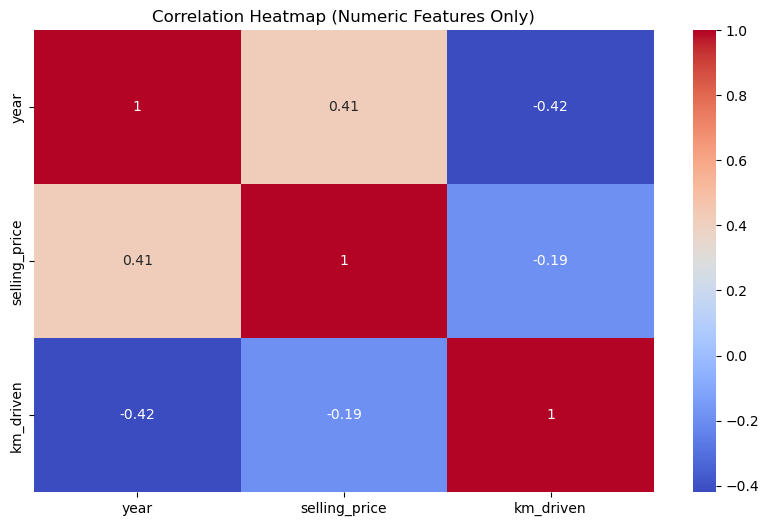

In [49]:
#Identify correlations and data distributions
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

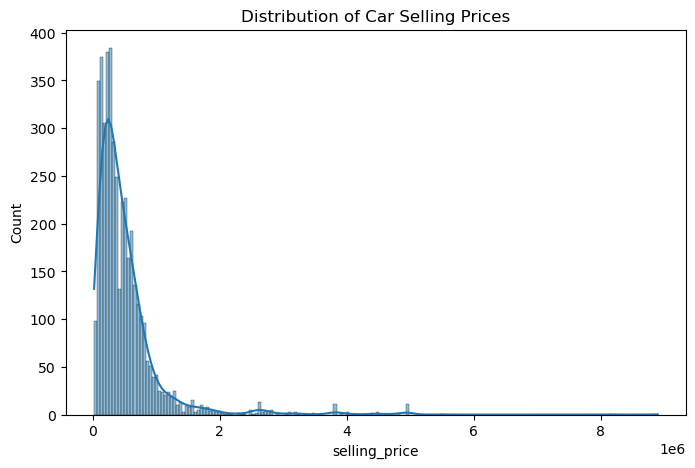

In [50]:
#2. Exploratory Data Analysis (EDA)

#Visualize how features affect the car price
#Plot heatmaps, histograms, and boxplots to gain insights

#HISTOGRAM
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], kde=True)
plt.title("Distribution of Car Selling Prices")
plt.show()



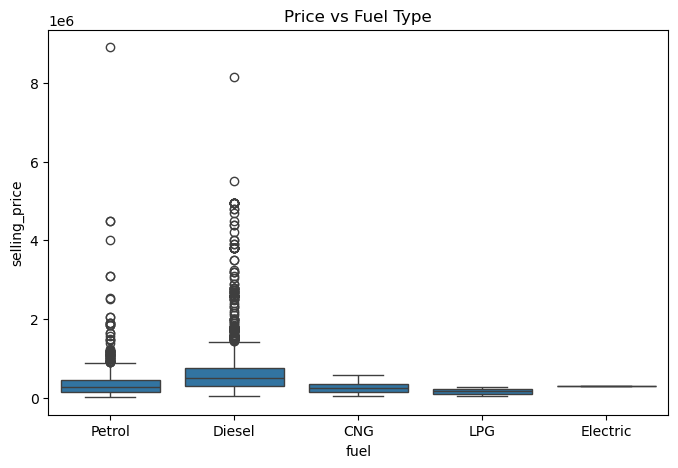

In [51]:
#BOXPLOT
plt.figure(figsize=(8,5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title("Price vs Fuel Type")
plt.show()

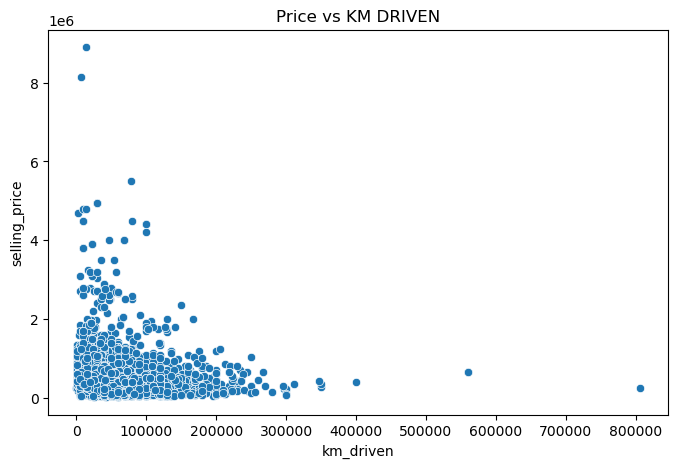

In [52]:
#SCATTERPLOT
plt.figure(figsize=(8,5))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title("Price vs KM DRIVEN")
plt.show()

In [53]:
#3. Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
categorical = ['name', 'fuel', 'transmission', 'owner','seller_type']
df_encoded = df.copy()

le = LabelEncoder()
for col in categorical:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.dropna(inplace=True)
X = df_encoded.drop(['selling_price'], axis=1)
y = df_encoded['selling_price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [54]:
#4. Model Development - Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [55]:
# 5. Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation Metrics:
MAE: 221820.84
MSE: 184332080354.49
RMSE: 429339.12
R² Score: 0.40
